# P-SV reflection and transmission at a planar interface

We adopt the same geometric setting as before. Two different cases of incoming waves need to be considered:

**Incoming SV wave**:

\begin{equation}
\mathbf{u}=\begin{pmatrix} \cos\phi_1 \\ 0 \\ \sin\phi_1 \end{pmatrix} e^{i(\mathbf{k}\cdot\mathbf{x}-\omega t)}\,,\quad \mathbf{k}=\frac{\omega}{\beta_1} \begin{pmatrix} \sin\phi_1 \\ 0 \\ -\cos\phi_1 \end{pmatrix}
\end{equation}

**Incoming P wave**:

\begin{equation}
\mathbf{u}=\begin{pmatrix} \sin\psi_1 \\ 0 \\ -\cos\psi_1 \end{pmatrix} e^{i(\mathbf{k}\cdot\mathbf{x}-\omega t)}\,,\quad \mathbf{k}=\frac{\omega}{\alpha_1} \begin{pmatrix} \sin\psi_1 \\ 0 \\ -\cos\psi_1 \end{pmatrix}
\end{equation}

Note that we use $\phi$ for S wave angles and $\psi$ for P wave angles. In any case, the set of reflected and transmitted waves is always the same:

**Reflected SV wave**:

\begin{equation}
\mathbf{u}=R_S \begin{pmatrix} \cos\phi_1 \\ 0 \\ -\sin\phi_1 \end{pmatrix} e^{i(\mathbf{k}\cdot\mathbf{x}-\omega t)}\,,\quad \mathbf{k}=\frac{\omega}{\beta_1} \begin{pmatrix} \sin\phi_1 \\ 0 \\ \cos\phi_1 \end{pmatrix}
\end{equation}

Note that the polarisation vector is defined such that the polarisation/amplitude of the incident and reflected SC waves are identical for normal incidence ($\phi_1=0$).

**Reflected P wave**:

\begin{equation}
\mathbf{u}=R_P\begin{pmatrix} \sin\psi_1 \\ 0 \\ \cos\psi_1 \end{pmatrix} e^{i(\mathbf{k}\cdot\mathbf{x}-\omega t)}\,,\quad \mathbf{k}=\frac{\omega}{\alpha_1} \begin{pmatrix} \sin\psi_1 \\ 0 \\ \cos\psi_1 \end{pmatrix}
\end{equation}

**Transmitted SV wave**:

\begin{equation}
\mathbf{u}=T_S \begin{pmatrix} \cos\phi_2 \\ 0 \\ \sin\phi_2 \end{pmatrix} e^{i(\mathbf{k}\cdot\mathbf{x}-\omega t)}\,,\quad \mathbf{k}=\frac{\omega}{\beta_2} \begin{pmatrix} \sin\phi_2 \\ 0 \\ -\cos\phi_2 \end{pmatrix}
\end{equation}

**Transmitted P wave**:

\begin{equation}
\mathbf{u}=T_P \begin{pmatrix} \sin\psi_2 \\ 0 \\ -\cos\psi_2 \end{pmatrix} e^{i(\mathbf{k}\cdot\mathbf{x}-\omega t)}\,,\quad \mathbf{k}=\frac{\omega}{\alpha_2} \begin{pmatrix} \sin\psi_2 \\ 0 \\ -\cos\psi_2 \end{pmatrix}
\end{equation}

The application of the kinematic and dynamic boundary conditions leads to a linear system of four equations, that involves the scattering matrix and the vector or reflection/transmission coefficients:

\begin{equation}
\begin{pmatrix}
\cos\phi_1 & \sin\psi_1 & -\cos\phi_2 & -\sin\psi_2 \\\\
-\sin\phi_1 & \cos\psi_1 & -\sin\phi_2 & \cos\psi_2 \\\\
\mu_1\beta_1^{-1} (\cos^2\phi_1 - \sin^2\phi_1) & 2\mu_1\alpha_1^{-1}\sin\psi_1\cos\psi_1 & \mu_2\beta_2^{-1} (\cos^2\phi_2-\sin^2\phi_2) & 2\mu_2\alpha_2^{-1} \sin\psi_2\cos\psi_2 \\\\
-2\mu_1\beta_1^{-1} \sin\phi_1\cos\phi_1 & 2\mu_1\alpha_1^{-1} \cos^2\psi_1 +\lambda_1\alpha_1^{-1} & 2\mu_2\beta_2^{-1} \sin\phi_2\cos\phi_2 & -2\mu_2\alpha_2^{-1} \cos^2\psi_2 - \lambda_2\alpha_2^{-1}
\end{pmatrix}
\begin{pmatrix} R_S \\ R_P \\ T_S \\ T_P \end{pmatrix} = \mathbf{h}
\end{equation}

The right-hand side depends on the type of incident wave:

**Incident SV wave**:

\begin{equation}
\mathbf{h} = \begin{pmatrix} -\cos\phi_1 \\ -\sin\phi_1 \\ \mu_1\beta_1^{-1} (\cos^2\phi_1 - \sin^2\phi_1) \\ 2\mu_1\beta_1^{-1} \sin\phi_1\cos\phi_1 \end{pmatrix}
\end{equation}

**Incident P wave**:

\begin{equation}
\mathbf{h} = \begin{pmatrix} -\sin\psi_1 \\ \cos\psi_1 \\ 2\mu_1\alpha_1^{-1} \sin\psi_1\cos\psi_1 \\ -2\mu_1\alpha_1^{-1}\cos^2\psi_1 -\lambda_1\alpha_1^{-1} \end{pmatrix}
\end{equation}

# 0. Python packages and input

## 0.1. Python packages and figure embellishment

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.major.pad']='12'
plt.rcParams['ytick.major.pad']='12'

## 0.2. Input parameters 

In [2]:
# incident wave mode, 'P' or 'SV'.
mode='SV'

# P velocity of upper layer [m/s].
alpha1=3800.0
# S velocity of upper layer [m/s].
beta1=1800.0
# Density of upper layer [kg/m**3].
rho1=1500.0

# P velocity of lower layer [m/s].
alpha2=3810.0
# S velocity of lower layer [m/s].
beta2=1810.0
# Density of elastic half space [kg/m**3].
rho2=1500.0

### Critical angles for incident P wave

In [3]:
psi_cp=np.arcsin(alpha1/alpha2)*180.0/np.pi
print('P-wave critical angle: %f degree' % psi_cp)
psi_cs=np.arcsin(alpha1/beta2)*180.0/np.pi
print('S-wave critical angle: %f degree' % psi_cs)

P-wave critical angle: 85.847877 degree
S-wave critical angle: nan degree


/var/folders/6r/8k4bk9516_lglt5l2j9q9gph0000gn/T/ipykernel_66382/1759714449.py:3: RuntimeWarning: invalid value encountered in arcsin
  psi_cs=np.arcsin(alpha1/beta2)*180.0/np.pi


### Critical angles for incident SV wave

In [4]:
phi_cp=np.arcsin(beta1/alpha2)*180.0/np.pi
print('P-wave critical angle: %f degree' % phi_cp)
phi_cs=np.arcsin(beta1/beta2)*180.0/np.pi
print('S-wave critical angle: %f degree' % phi_cs)

P-wave critical angle: 28.192861 degree
S-wave critical angle: 83.974425 degree


# 1. Reflection and transmission coefficients

## 1.1. Compute and reflection and transmission coefficients

In [5]:
# Compute reflection and transmission coefficients for a given wave mode and incidence angle.

def RT(i,alpha1,beta1,rho1,alpha2,beta2,rho2,mode='P'):
    """
    i=incidence angle [rad]
    alpha1,beta1,rho1=properties of upper layer in SI units
    alpha2,beta2,rho2=properties of lower layer in SI units
    mode='P' for incident P wave, 'SV' for incident SV wave
    """
    
    #= Initialisations. ===========================================================
    
    # Compute elastic moduli.
    mu1=rho1 * beta1**2
    lambda1=rho1 * alpha1**2  - 2.0*mu1
    mu2=rho2 * beta2**2
    lambda2=rho2 * alpha2**2  - 2.0*mu2
    
    # Inverse S-wave impedance used to scale the third and fourth equations of the linear
    # system for better conditioning.
    
    scale=1.0/(beta1*rho1)
    #scale=1.0
    
    # Compute sines and cosines of all other angles.
    if mode=='P':
        
        psi1=i
        
        sin_psi1=np.sin(psi1)
        sin_psi2=(alpha2/alpha1)*sin_psi1
        sin_phi1=(beta1/alpha1)*sin_psi1
        sin_phi2=(beta2/alpha1)*sin_psi1
        
    elif mode=='SV':
        
        phi1=i
        
        sin_phi1=np.sin(phi1)
        sin_phi2=(beta2/beta1)*sin_phi1
        sin_psi1=(alpha1/beta1)*sin_phi1
        sin_psi2=(alpha2/beta1)*sin_phi1
        
    cos_phi1=np.sqrt(1.0-sin_phi1**2 + 0.0j)
    cos_phi2=np.sqrt(1.0-sin_phi2**2 + 0.0j)
    cos_psi1=np.sqrt(1.0-sin_psi1**2 + 0.0j)
    cos_psi2=np.sqrt(1.0-sin_psi2**2 + 0.0j)
    
    #= Compute entries of the scattering matrix. ==================================
    
    A11=-cos_phi1
    A12=-sin_psi1
    A13=cos_phi2
    A14=sin_psi2

    A21=sin_phi1
    A22=-cos_psi1
    A23=sin_phi2
    A24=-cos_psi2

    A31=(mu1*(sin_phi1**2 - cos_phi1**2)/beta1)*scale
    A32=(-2.0*mu1*(sin_psi1*cos_psi1)/alpha1)*scale
    A33=(mu2*(sin_phi2**2 - cos_phi2**2)/beta2)*scale
    A34=(-2.0*mu2*(sin_psi2*cos_psi2)/alpha2)*scale
    
    A41=(2.0*mu1*sin_phi1*cos_phi1/beta1)*scale
    A42=(-2.0*mu1*cos_psi1**2/alpha1-lambda1/alpha1)*scale
    A43=(-2.0*mu2*sin_phi2*cos_phi2/beta2)*scale
    A44=(2.0*mu2*cos_psi2**2/alpha2+lambda2/alpha2)*scale

    A=np.array([[A11, A12, A13, A14],[A21, A22, A23, A24],[A31, A32, A33, A34],[A41, A42, A43, A44]])
    
    #= Compute right-hand side. ===================================================
    
    if mode=='P':
        
        h1=sin_psi1
        h2=-cos_psi1
        h3=(-2.0*mu1*sin_psi1*cos_psi1/alpha1)*scale
        h4=(2.0*mu1*cos_psi1**2/alpha1+lambda1/alpha1)*scale
        
    elif mode=='SV':
        
        h1=cos_phi1
        h2=sin_phi1
        h3=(mu1*(sin_phi1**2-cos_phi1**2)/beta1)*scale
        h4=(-2.0*mu1*sin_phi1*cos_phi1/beta1)*scale
        
    h=np.array([[h1],[h2],[h3],[h4]])
        
    #= Solve linear system and return. ============================================
    
    rt=linalg.solve(A,h)

    # Return Rs, Rp, Ts, Tp
    return rt[0],rt[1],rt[2],rt[3] 

In [6]:
# Range of incidence angles.
angle=np.linspace(0.0,np.pi/2.0-0.01,1000,dtype='complex64')

# Initialise reflection and transmission coefficients.
Rs=np.zeros(len(angle),dtype='complex64')
Rp=np.zeros(len(angle),dtype='complex64')
Ts=np.zeros(len(angle),dtype='complex64')
Tp=np.zeros(len(angle),dtype='complex64')

# March through incidence angles and compute coefficients.
for i in range(len(angle)):
    Rs[i],Rp[i],Ts[i],Tp[i]=RT(angle[i],alpha1,beta1,rho1,alpha2,beta2,rho2,mode=mode)

## 1.2. Plot as a function of incidence angle

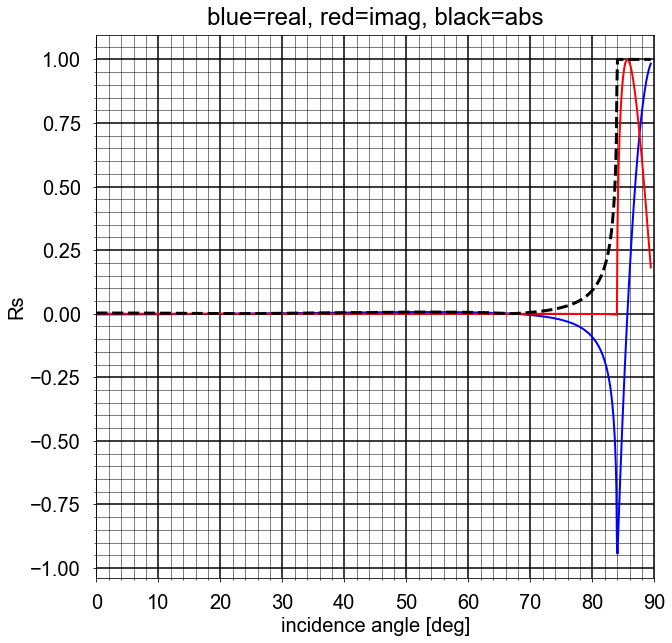

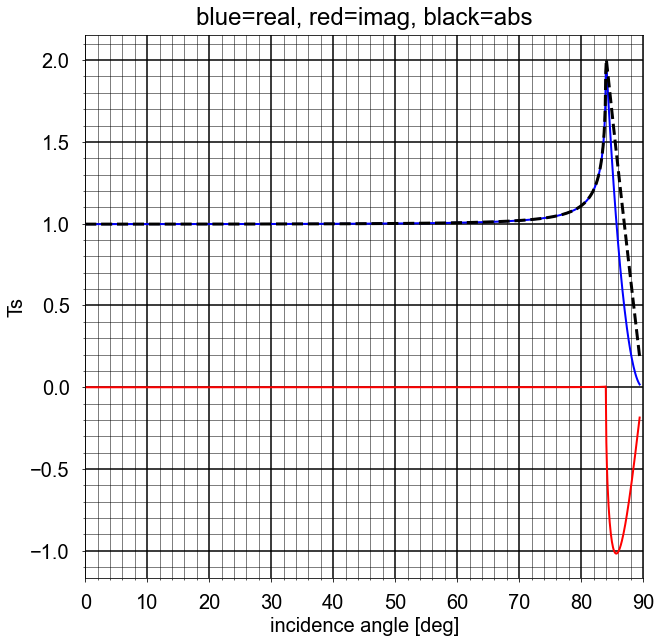

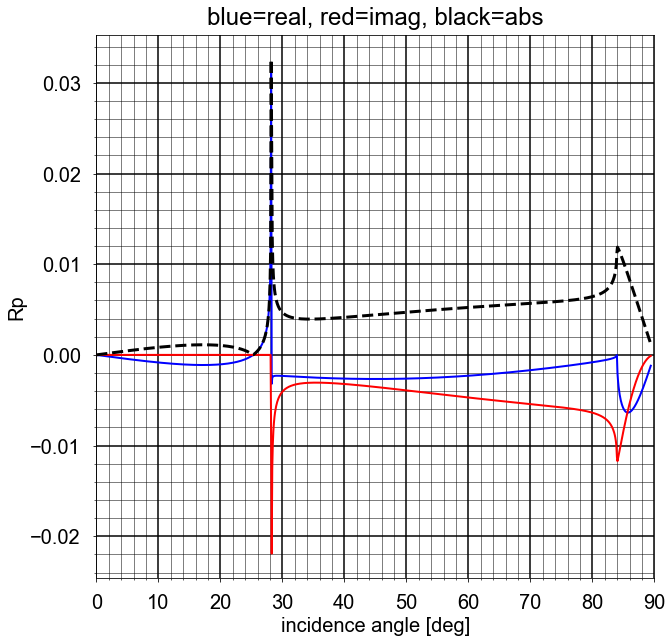

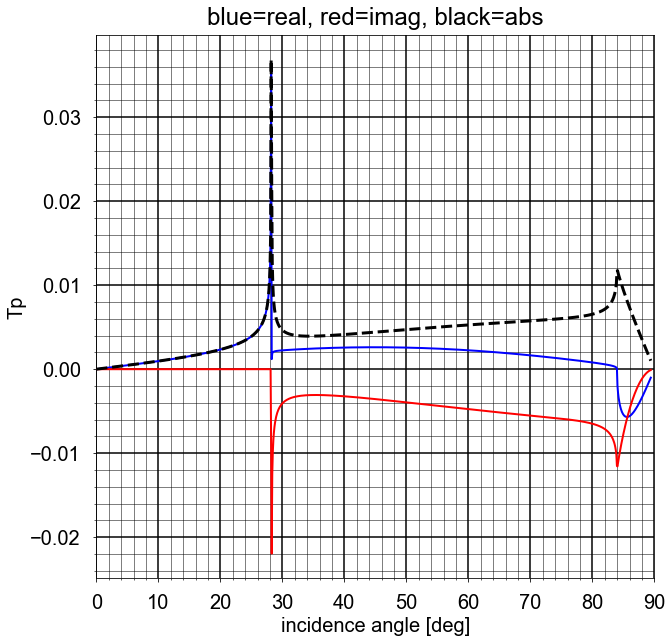

In [7]:
# S wave reflection coefficient
fig=plt.figure(figsize=(10,10))
plt.plot(np.real(angle)*180.0/np.pi,np.real(Rs),'b',linewidth=2)
plt.plot(np.real(angle)*180.0/np.pi,np.imag(Rs),'r',linewidth=2)
plt.plot(np.real(angle)*180.0/np.pi,np.abs(Rs),'--k',linewidth=3)
plt.minorticks_on()
plt.grid(which='major',color='k',linewidth=1.5)
plt.grid(which='minor',color='k',linewidth=0.5)
plt.xlabel('incidence angle [deg]')
plt.ylabel('Rs')
plt.xlim([0.0,90.0])
#plt.ylim(-1.1,1.1)
plt.title('blue=real, red=imag, black=abs',pad=10)
plt.show()

# S wave transmission coefficient.
fig=plt.figure(figsize=(10,10))
plt.plot(np.real(angle)*180.0/np.pi,np.real(Ts),'b',linewidth=2)
plt.plot(np.real(angle)*180.0/np.pi,np.imag(Ts),'r',linewidth=2)
plt.plot(np.real(angle)*180.0/np.pi,np.abs(Ts),'--k',linewidth=3)
plt.minorticks_on()
plt.grid(which='major',color='k',linewidth=1.5)
plt.grid(which='minor',color='k',linewidth=0.5)
plt.xlabel('incidence angle [deg]')
plt.ylabel('Ts')
plt.xlim([0.0,90.0])
#plt.ylim(-1.1,1.1)
plt.title('blue=real, red=imag, black=abs',pad=10)
plt.show()

# P wave reflection coefficient
fig=plt.figure(figsize=(10,10))
plt.plot(np.real(angle)*180.0/np.pi,np.real(Rp),'b',linewidth=2)
plt.plot(np.real(angle)*180.0/np.pi,np.imag(Rp),'r',linewidth=2)
plt.plot(np.real(angle)*180.0/np.pi,np.abs(Rp),'--k',linewidth=3)
plt.minorticks_on()
plt.grid(which='major',color='k',linewidth=1.5)
plt.grid(which='minor',color='k',linewidth=0.5)
plt.xlabel('incidence angle [deg]')
plt.ylabel('Rp')
plt.xlim([0.0,90.0])
#plt.ylim(-1.1,1.1)
plt.title('blue=real, red=imag, black=abs',pad=10)
plt.show()

# P wave transmission coefficient.
fig=plt.figure(figsize=(10,10))
plt.plot(np.real(angle)*180.0/np.pi,np.real(Tp),'b',linewidth=2)
plt.plot(np.real(angle)*180.0/np.pi,np.imag(Tp),'r',linewidth=2)
plt.plot(np.real(angle)*180.0/np.pi,np.abs(Tp),'--k',linewidth=3)
plt.minorticks_on()
plt.grid(which='major',color='k',linewidth=1.5)
plt.grid(which='minor',color='k',linewidth=0.5)
plt.xlabel('incidence angle [deg]')
plt.ylabel('Tp')
plt.xlim([0.0,90.0])
#plt.ylim(-1.1,1.1)
plt.title('blue=real, red=imag, black=abs',pad=10)
plt.show()